In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [34]:
data_apart=pd.read_csv('../../Dataset_Apart/Cleaned/DatasetAirbnb_Cleaned_v1.csv')
data_apart.head()

,ID,Titulo,Descripcion Simple,Evaluaciones,Tipo,Precio,URL,Limpieza,Veracidad,Llegada,...,Baños,Dormitorios,Baño Compartido,Wifi,Mascotas,Piscina,Parking,url_img,Latitud,Longitud
0,1200688382914319681,Magníficas vistas sobre la arena de la playa Wifi,Alojamiento entero: piso en Guardamar de la Sa...,59.0,2.0,78.0,https://www.airbnb.es/rooms/31709557?adults=1&...,4.900000,4.900000,5.00000,...,2.0,3.0,0.0,1.0,1.0,1.0,1.0,https://a0.muscache.com/im/pictures/6565c039-1...,38.961524,-0.148815
1,5375220911806434689,Melior-1E,"Alojamiento entero: piso en Calp, España",8.0,2.0,83.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.900000,4.500000,4.50000,...,2.0,2.0,0.0,1.0,0.0,0.0,0.0,https://a0.muscache.com/im/pictures/prohost-ap...,38.644325,0.046012
2,556517738340669403,VERALUX,"Alojamiento entero: piso en Benidorm, España",20.0,2.0,70.0,https://www.airbnb.es/rooms/46527977?adults=1&...,3.500000,4.600000,4.70000,...,2.0,2.0,0.0,1.0,1.0,1.0,0.0,https://a0.muscache.com/im/pictures/53a4fda7-6...,38.540625,-0.129093
3,8800182335332003755,Isea Calpe,"Alojamiento entero: piso en Calp, España",557.0,2.0,128.0,https://www.airbnb.es/rooms/721277134871448378...,4.731154,4.814743,4.84089,...,2.0,2.0,0.0,1.0,0.0,1.0,0.0,https://a0.muscache.com/im/pictures/prohost-ap...,38.644325,0.046012
4,-5036294419472545696,"Apartamento luminoso, internet, Netflix",Alojamiento entero: apto. residencial en Grau ...,64.0,2.0,85.0,https://www.airbnb.es/rooms/50155790?adults=1&...,4.900000,4.900000,4.90000,...,1.0,2.0,0.0,1.0,0.0,1.0,1.0,https://a0.muscache.com/im/pictures/63ba269e-2...,38.993433,-0.161524


In [35]:
data_apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  788 non-null    int64  
 1   Titulo              788 non-null    object 
 2   Descripcion Simple  788 non-null    object 
 3   Evaluaciones        788 non-null    float64
 4   Tipo                788 non-null    float64
 5   Precio              788 non-null    float64
 6   URL                 788 non-null    object 
 7   Limpieza            788 non-null    float64
 8   Veracidad           788 non-null    float64
 9   Llegada             788 non-null    float64
 10  Comunicacion        788 non-null    float64
 11  Ubicacion           788 non-null    float64
 12  Calidad             788 non-null    float64
 13  Localizacion        784 non-null    object 
 14  Capacidad           788 non-null    float64
 15  Camas               788 non-null    float64
 16  Baños   

# **Comprobamos valores nulos**
---

In [36]:
data_apart.isna().sum()

ID                    0
Titulo                0
Descripcion Simple    0
Evaluaciones          0
Tipo                  0
Precio                0
URL                   0
Limpieza              0
Veracidad             0
Llegada               0
Comunicacion          0
Ubicacion             0
Calidad               0
Localizacion          4
Capacidad             0
Camas                 0
Baños                 0
Dormitorios           0
Baño Compartido       0
Wifi                  0
Mascotas              0
Piscina               0
Parking               0
url_img               0
Latitud               0
Longitud              0
dtype: int64

# **Descripcion de las variables numéricas**
---

In [6]:
data_apart.describe()

,ID,Evaluaciones,Precio,Limpieza,Veracidad,Llegada,Comunicacion,Ubicacion,Calidad,Capacidad,Camas,Baños,Dormitorios,Baño Compartido,Wifi,Mascotas,Piscina,Parking,Latitud,Longitud
count,7.880000e+02,771.000000,788.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,726.000000,763.000000,727.000000,711.000000,788.000000,784.000000,784.000000,784.000000,784.000000,788.000000,788.000000
mean,1.997703e+17,90.084306,151.396995,4.731154,4.814743,4.840890,4.867316,4.828095,4.685535,5.619835,3.787680,2.033012,2.465541,0.045685,0.806122,0.428571,0.437500,0.871173,268.636112,226.410186
std,5.433749e+18,279.176394,135.834429,0.282059,0.214397,0.195057,0.204755,0.171883,0.243722,3.304558,2.832971,1.520841,1.459744,0.208934,0.395586,0.495188,0.496395,0.335222,1488.815167,1495.276098
min,-9.203792e+18,1.000000,0.000000,2.800000,2.700000,3.200000,3.000000,3.300000,3.300000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.012908,-9.388100
25%,-4.758058e+18,15.000000,75.000000,4.600000,4.800000,4.800000,4.800000,4.800000,4.600000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,39.663173,-3.923101
50%,4.143693e+17,40.000000,110.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,5.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,40.716337,-1.761650
75%,4.943199e+18,98.500000,180.000000,4.900000,5.000000,5.000000,5.000000,4.900000,4.800000,6.000000,5.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,43.322422,-0.129093
max,9.198468e+18,6854.000000,1270.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,22.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,10000.000000


# **Descripcion de las variables categóricas**
---

In [7]:
data_apart.describe(include='O')

,Titulo,Descripcion Simple,Tipo,URL,Localizacion,url_img
count,788,788,788,788,784,788
unique,785,537,3,788,408,753
top,Casa de madera en plena naturaleza,"Alojamiento entero: piso en Benidorm, España",En el campo,https://www.airbnb.es/rooms/848510545869492378...,"Benidorm, Comunidad Valenciana, España",https://a0.muscache.com/im/pictures/mediaverse...
freq,2,31,266,1,35,32


# **Conversion de localización a latitud, longitud**
---

In [8]:
from time import sleep
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd

def lat_log(l):
    geolocator = Nominatim(user_agent="España")
    try:
        location = geolocator.geocode(l)
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    except:
        return 10000,10000
data_apart['Latitud_Longitud']=data_apart['Localizacion'].apply(lambda x: lat_log(x))



In [9]:
data_apart['Latitud']=data_apart['Latitud_Longitud'].apply(lambda x: x[0])
data_apart['Longitud']=data_apart['Latitud_Longitud'].apply(lambda x: x[1])
data_apart.drop('Latitud_Longitud',axis=1,inplace=True)

In [9]:
data_apart.drop('Localizacion',axis=1,inplace=True)

In [11]:
data_apart.to_csv('../../Dataset_Apart/Cleaned/DatasetAirbnb_Cleaned_v1.csv',index=False)

In [8]:
data_apart.head()

,ID,Titulo,Descripcion Simple,Evaluaciones,Tipo,Precio,URL,Limpieza,Veracidad,Llegada,...,Baños,Dormitorios,Baño Compartido,Wifi,Mascotas,Piscina,Parking,url_img,Latitud,Longitud
0,1200688382914319681,Magníficas vistas sobre la arena de la playa Wifi,Alojamiento entero: piso en Guardamar de la Sa...,59.0,A pie de playa,78.0,https://www.airbnb.es/rooms/31709557?adults=1&...,4.9,4.9,5.0,...,2.0,3.0,0,1.0,1.0,1.0,1.0,https://a0.muscache.com/im/pictures/6565c039-1...,38.961524,-0.148815
1,5375220911806434689,Melior-1E,"Alojamiento entero: piso en Calp, España",8.0,A pie de playa,83.0,https://www.airbnb.es/rooms/37584336?adults=1&...,4.9,4.5,4.5,...,2.0,2.0,0,1.0,0.0,0.0,0.0,https://a0.muscache.com/im/pictures/prohost-ap...,38.644325,0.046012
2,556517738340669403,VERALUX,"Alojamiento entero: piso en Benidorm, España",20.0,A pie de playa,70.0,https://www.airbnb.es/rooms/46527977?adults=1&...,3.5,4.6,4.7,...,2.0,2.0,0,1.0,1.0,1.0,0.0,https://a0.muscache.com/im/pictures/53a4fda7-6...,38.540625,-0.129093
3,8800182335332003755,Isea Calpe,"Alojamiento entero: piso en Calp, España",557.0,A pie de playa,128.0,https://www.airbnb.es/rooms/721277134871448378...,NaN,NaN,NaN,...,2.0,2.0,0,1.0,0.0,1.0,0.0,https://a0.muscache.com/im/pictures/prohost-ap...,38.644325,0.046012
4,-5036294419472545696,"Apartamento luminoso, internet, Netflix",Alojamiento entero: apto. residencial en Grau ...,64.0,A pie de playa,85.0,https://www.airbnb.es/rooms/50155790?adults=1&...,4.9,4.9,4.9,...,1.0,2.0,0,1.0,0.0,1.0,1.0,https://a0.muscache.com/im/pictures/63ba269e-2...,38.993433,-0.161524


# **Estudio del Precio**
---

In [20]:
import pandas as pd
import plotly.express as px

# Datos con latitud/longitud y valores
datos=data_apart[(data_apart['Latitud']!=10000)&(data_apart['Longitud']!=10000)][['Latitud','Longitud','Precio']]
fig = px.density_mapbox(datos, lat = 'Latitud', lon = 'Longitud', z = 'Precio',
                        radius = 7,
                        center = dict(lat = 40.45, lon = -3.6),
                        zoom = 4,
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = 'rainbow',
                        opacity = 0.5)
fig.show() 


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

En el mapa se observan 3 focos principales, Madrid, Alicante y Navarra, como los lugares mas caros.

#### **Precio medio por tipo de apartamento**

<Axes: >

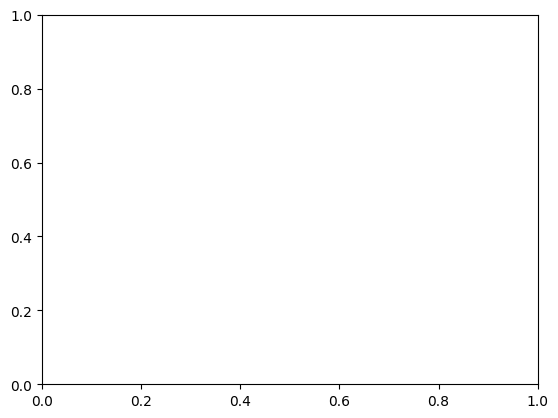

In [32]:
sns.barplot(data=data_apart.groupby('Tipo').agg({
    'Precio':'mean'
}).reset_index(), x='Tipo',y='Precio')


En principio el tipo de apartamento mas caro, son los de tipo en el campo, seguramente debido al mayor espacio que tienen sus propiedades de media.

#### **Relacion entre media de valoraciones y precio**

<Axes: xlabel='Precio', ylabel='Calidad'>

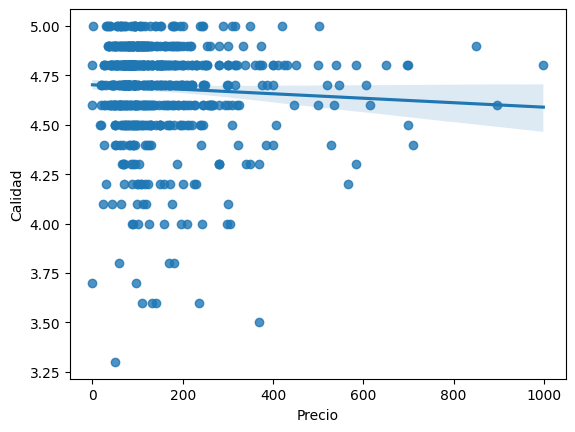

In [11]:
sns.regplot(data=data_apart,x='Precio',y='Calidad')

#### **Relacion entre limpieza y precio**

<Axes: xlabel='Precio', ylabel='Limpieza'>

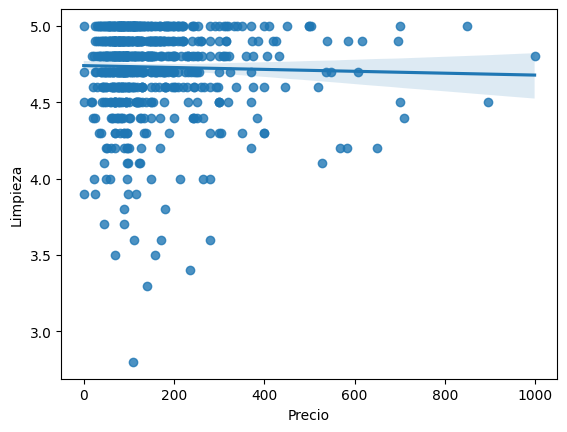

In [12]:
sns.regplot(data=data_apart,x='Precio',y='Limpieza')

# **Clustering apartamentos**

In [13]:
data_apart.columns

Index(['ID', 'Titulo', 'Descripcion Simple', 'Evaluaciones', 'Tipo', 'Precio',
       'URL', 'Limpieza', 'Veracidad', 'Llegada', 'Comunicacion', 'Ubicacion',
       'Calidad', 'Localizacion', 'Capacidad', 'Camas', 'Baños', 'Dormitorios',
       'Baño Compartido', 'Wifi', 'Mascotas', 'Piscina', 'Parking', 'url_img',
       'Latitud', 'Longitud'],
      dtype='object')

In [37]:
columnas_innecesarias_cluster=['ID','Titulo','Descripcion Simple','URL','url_img','Localizacion']
data_cluster=data_apart.drop(columnas_innecesarias_cluster,axis=1)


In [38]:
data_cluster

,Evaluaciones,Tipo,Precio,Limpieza,Veracidad,Llegada,Comunicacion,Ubicacion,Calidad,Capacidad,Camas,Baños,Dormitorios,Baño Compartido,Wifi,Mascotas,Piscina,Parking,Latitud,Longitud
0,59.0,2.0,78.0,4.900000,4.900000,5.00000,4.800000,4.900000,4.800000,6.0,5.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,38.961524,-0.148815
1,8.0,2.0,83.0,4.900000,4.500000,4.50000,4.800000,4.800000,4.800000,6.0,3.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,38.644325,0.046012
2,20.0,2.0,70.0,3.500000,4.600000,4.70000,4.800000,5.000000,4.300000,4.0,3.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,38.540625,-0.129093
3,557.0,2.0,128.0,4.731154,4.814743,4.84089,4.867316,4.828095,4.685535,4.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,38.644325,0.046012
4,64.0,2.0,85.0,4.900000,4.900000,4.90000,4.900000,4.700000,4.700000,6.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,38.993433,-0.161524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,57.0,1.0,161.0,4.700000,4.800000,4.80000,4.900000,5.000000,4.700000,8.0,5.0,2.0,4.0,0.0,1.0,1.0,0.0,1.0,40.280402,-7.504191
784,94.0,1.0,134.0,4.700000,4.700000,4.80000,4.900000,4.900000,4.600000,4.0,2.0,5.0,2.0,0.0,1.0,0.0,0.0,1.0,36.012908,-5.605021
785,78.0,1.0,140.0,4.900000,5.000000,5.00000,5.000000,4.900000,4.900000,5.0,5.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,38.049785,-1.670339
786,22.0,1.0,153.0,4.800000,4.800000,4.90000,4.800000,4.800000,4.800000,4.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,39.077335,-8.187297


In [39]:
imputer = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
cols_cat=['Wifi','Mascotas','Piscina','Parking']
not_cat=[col for col in data_cluster.columns if col not in cols_cat and col not in columnas_innecesarias_cluster]
data_cluster[cols_cat]=imputer_cat.fit_transform(data_cluster[cols_cat])
data_cluster[not_cat]=imputer.fit_transform(data_cluster[not_cat])

In [19]:
data_apart.to_csv('../../Dataset_Apart/Cleaned/DatasetAirbnb_Cleaned_v1.csv',index=False)

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
cols_cat=['Wifi','Mascotas','Piscina','Parking']
not_cat=[col for col in data_cluster.columns if col not in cols_cat]
data_cluster[cols_cat]=imputer_cat.fit_transform(data_cluster[cols_cat])
data_cluster[not_cat]=imputer.fit_transform(data_cluster[not_cat])

In [27]:
data_cluster.isna().sum()

Evaluaciones       0
Tipo               0
Precio             0
Limpieza           0
Veracidad          0
Llegada            0
Comunicacion       0
Ubicacion          0
Calidad            0
Capacidad          0
Camas              0
Baños              0
Dormitorios        0
Baño Compartido    0
Wifi               0
Mascotas           0
Piscina            0
Parking            0
Latitud            0
Longitud           0
dtype: int64

## **Método del codo**

Para k = 2 , el coste (SSE)= 74551117.41255374
Para k = 3 , el coste (SSE)= 28735278.985531606
Para k = 4 , el coste (SSE)= 20008728.145080462
Para k = 5 , el coste (SSE)= 12759284.5219623
Para k = 6 , el coste (SSE)= 9683672.545839855
Para k = 7 , el coste (SSE)= 6528004.807722353
Para k = 8 , el coste (SSE)= 5138646.806714085
Para k = 9 , el coste (SSE)= 4303176.251721046
Para k = 10 , el coste (SSE)= 3575177.3560750466


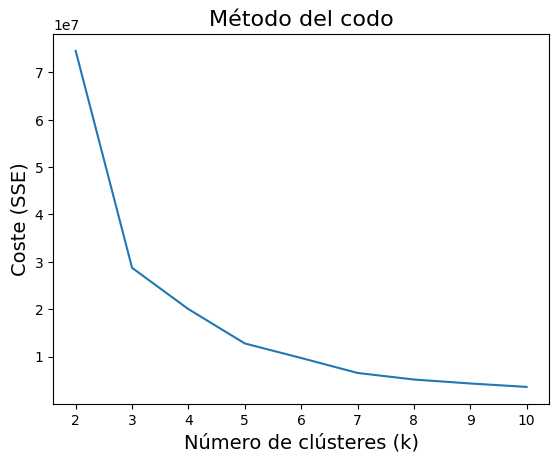

In [40]:
from sklearn.cluster import KMeans
Coste = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para el cálculo de la función de coste (SSE) desde k= 2 hasta k= 10
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
    print(
        "Para k =",
        num,
        ', el coste (SSE)=',
        kmeans.inertia_,
    )
    Coste.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.set_title('Método del codo', fontsize = 16)
ax.set_ylabel("Coste (SSE)",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
ax.plot(krange,Coste)
plt.show()

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

for k in [3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, n_init= 'auto', random_state=10, max_iter=3000)
    Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
    data_cluster['id_cluster']=kmeans.labels_
    silhouette_avg = silhouette_score(data_cluster.drop('id_cluster',axis=1),data_cluster['id_cluster'])
    cal=calinski_harabasz_score(data_cluster.drop('id_cluster',axis=1),data_cluster['id_cluster'])
    print('\nPara un Nº de clusters: ',k ,
          '\nS: ',silhouette_avg,
          '\nCH: ',cal)
    print('-'*50)


Para un Nº de clusters:  3 
S:  0.971264094462454 
CH:  48488.31291566455
--------------------------------------------------

Para un Nº de clusters:  4 
S:  0.6373239216156896 
CH:  46480.65438543732
--------------------------------------------------

Para un Nº de clusters:  5 
S:  0.6642961630729219 
CH:  54706.43457632764
--------------------------------------------------

Para un Nº de clusters:  6 
S:  0.48431919279525426 
CH:  57642.66423126712
--------------------------------------------------

Para un Nº de clusters:  7 
S:  0.5030671299737248 
CH:  71229.54173767545
--------------------------------------------------

Para un Nº de clusters:  8 
S:  0.45802291937107253 
CH:  77544.1529682091
--------------------------------------------------


El número óptimo de clusters son 3.

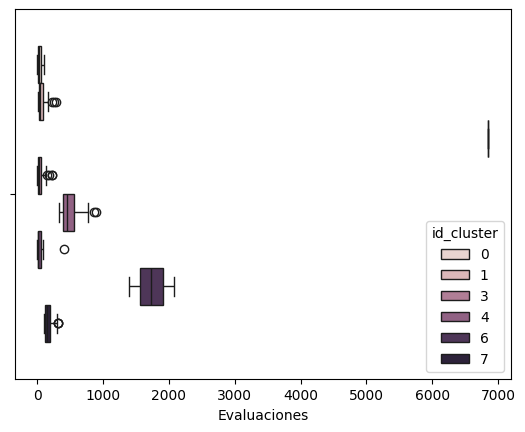

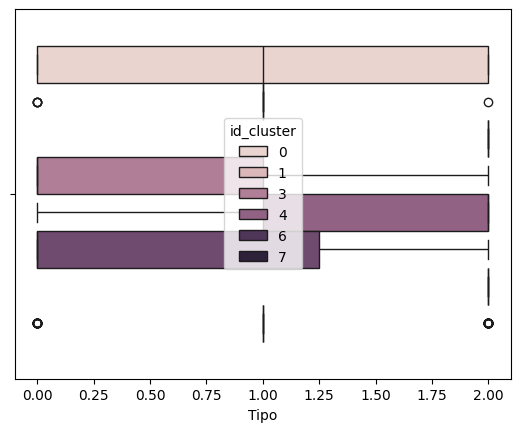

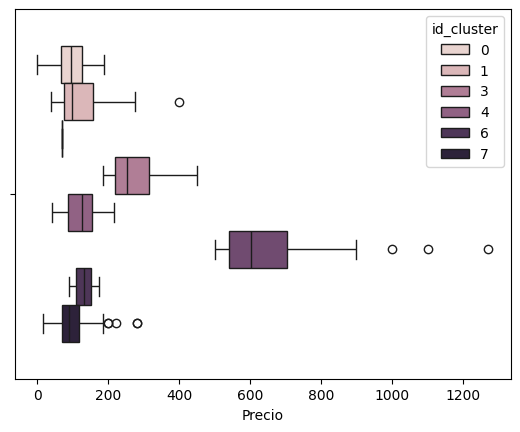

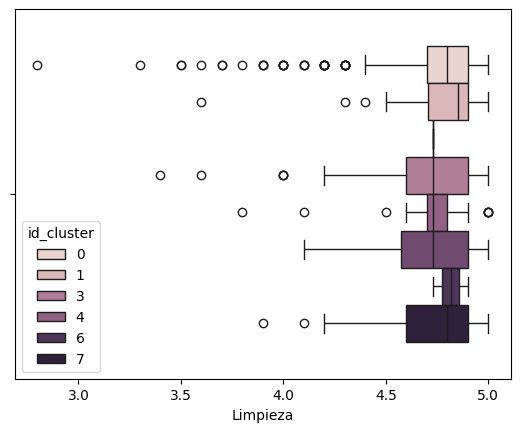

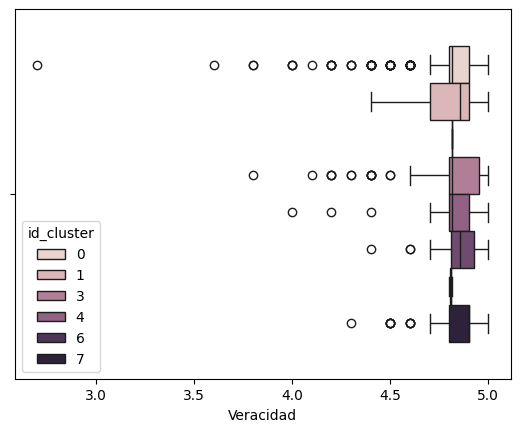

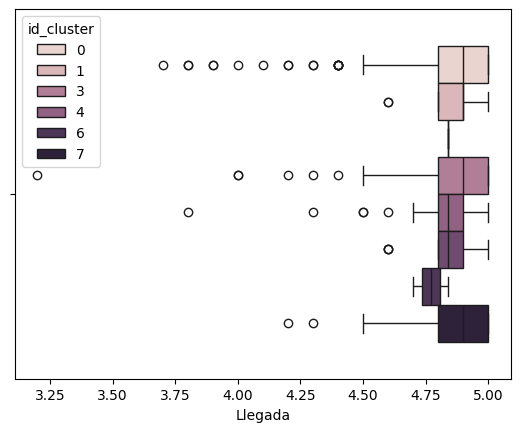

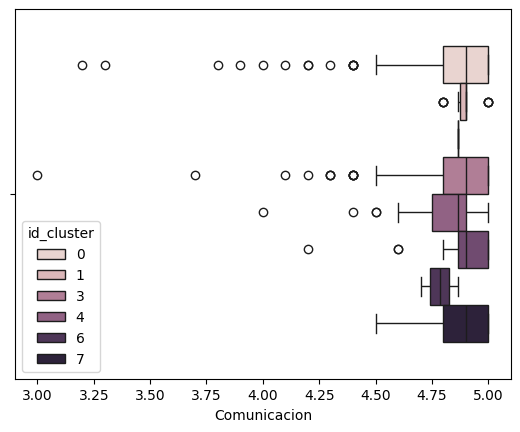

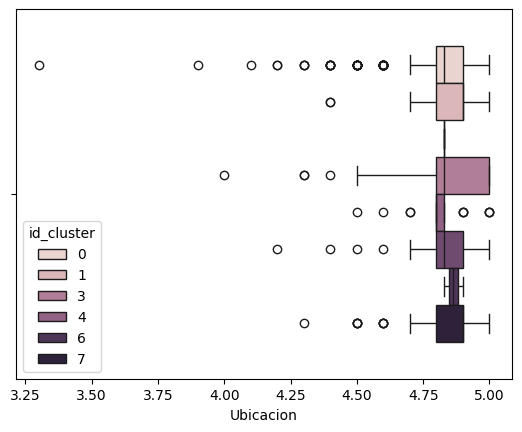

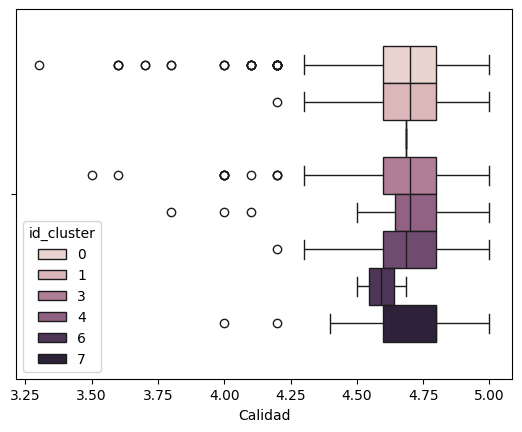

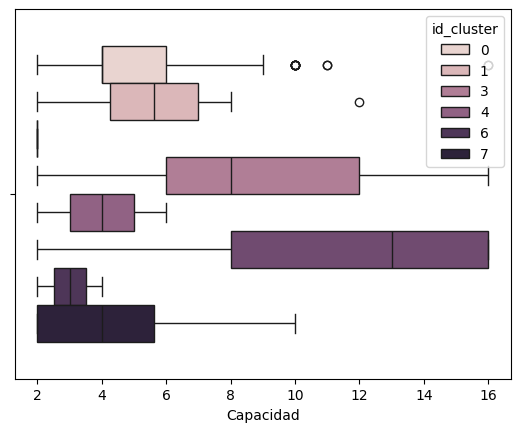

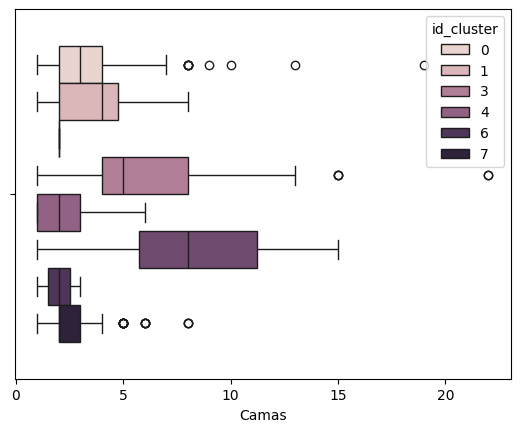

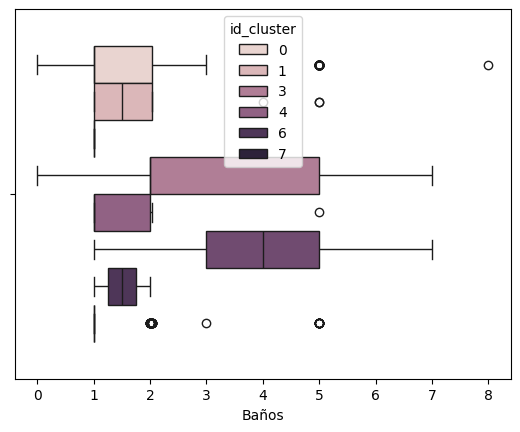

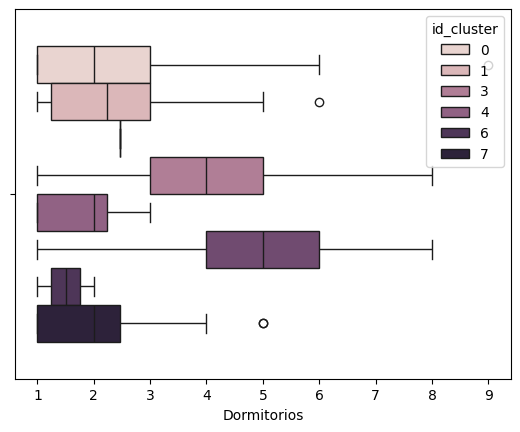

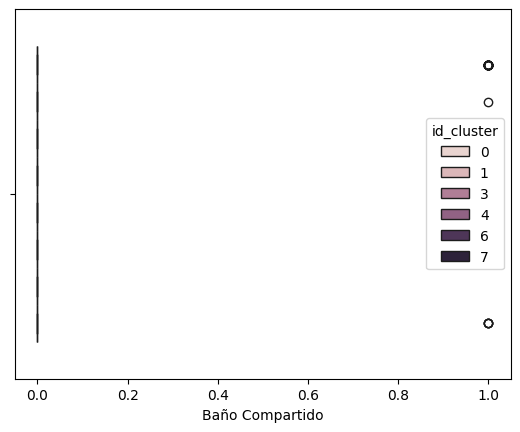

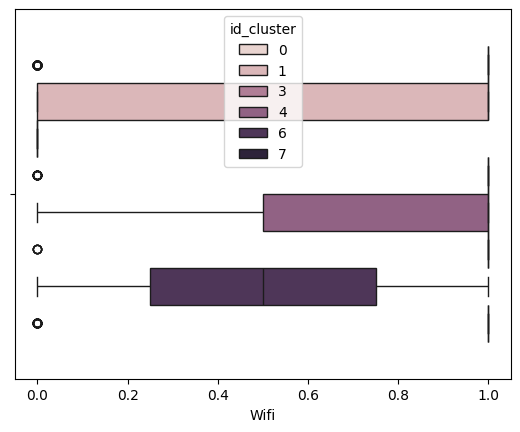

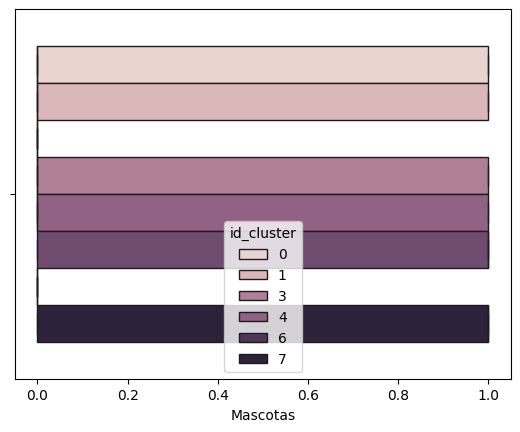

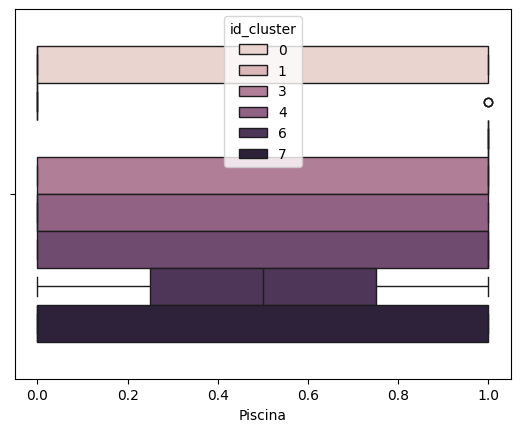

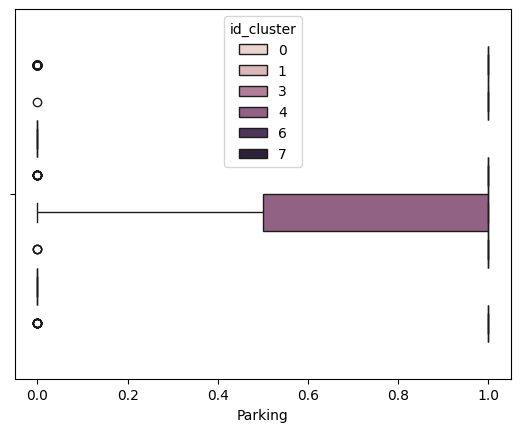

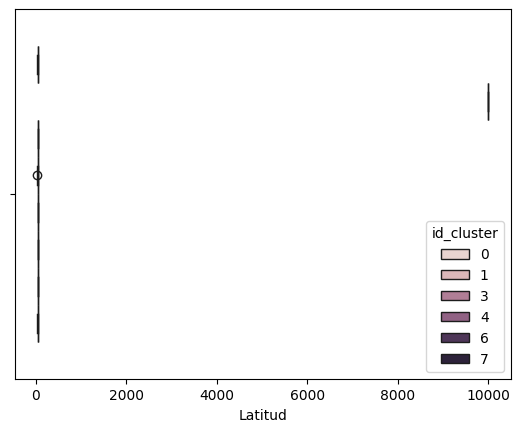

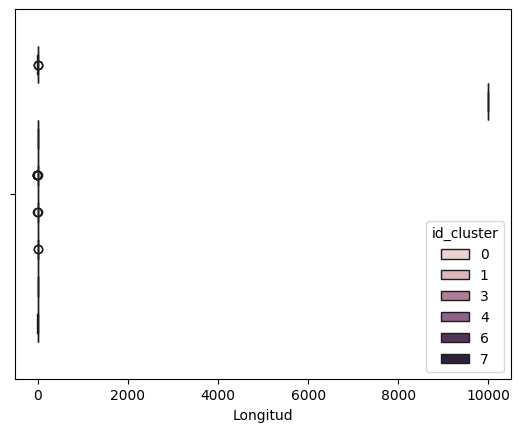

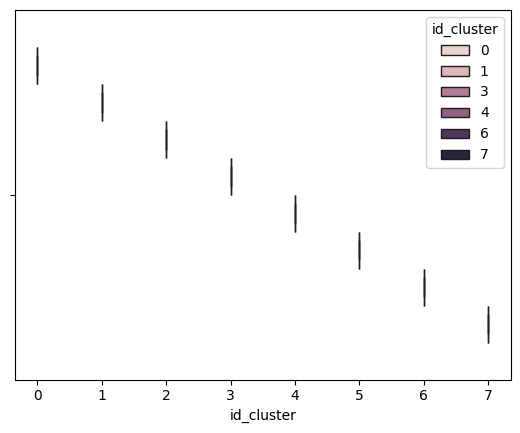

In [65]:
k_val=8
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
kmeans.labels_
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    sns.boxplot(data_cluster,x=col,hue='id_cluster')
    plt.show()

In [66]:
data_cluster['id_cluster'].value_counts()

id_cluster
0    412
7    153
3    147
5     28
4     27
1     18
6      2
2      1
Name: count, dtype: int64

## **Clustering jerárquico**
---

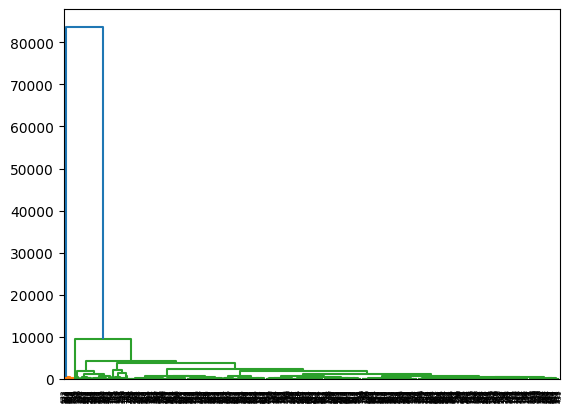

In [44]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

def hierarchical_clustering(X, num_clusters):
    Z = linkage(X, method='ward')
    clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
    return clusters
data_cluster.drop('id_cluster',axis=1,inplace=True)
num_clusters = 3
clusters = hierarchical_clustering(data_cluster, num_clusters=num_clusters)

# Visualización del dendrograma
plt.figure()
dendrogram(linkage(data_cluster, method='ward'))
plt.show()


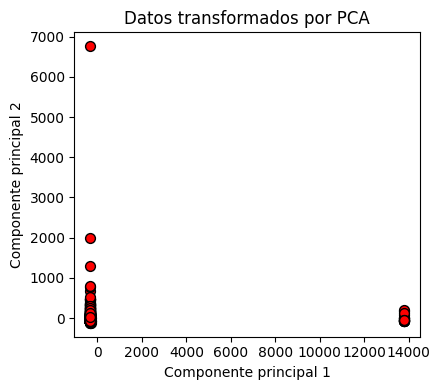

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_cluster)

# Visualización de los datos originales y los datos transformados
plt.figure(figsize=(8, 4))

# Datos transformados por PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', edgecolor='k', s=50)
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

plt.tight_layout()
plt.show()

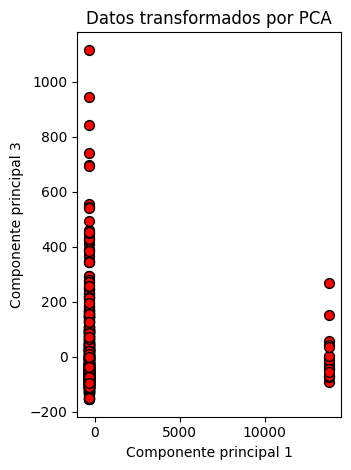

In [48]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 2], c='red', edgecolor='k', s=50)
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 3")

plt.tight_layout()
plt.show()

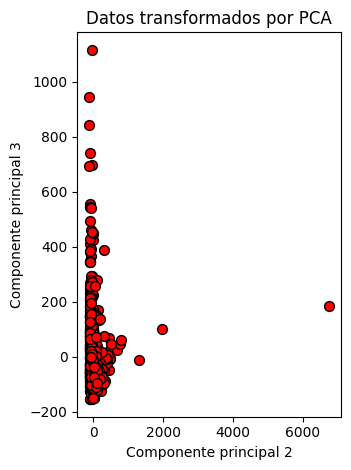

In [50]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 1], X_pca[:, 2], c='red', edgecolor='k', s=50)
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 2")
plt.ylabel("Componente principal 3")

plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
data_pca=pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3'])
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k, n_init= 'auto', random_state=10, max_iter=3000)
    Y_pred=kmeans.fit_predict(data_pca) # Vector de asignación de etiquetas predichas para cada elemento
    data_pca['id_cluster']=kmeans.labels_
    silhouette_avg = silhouette_score(data_pca.drop('id_cluster',axis=1),data_pca['id_cluster'])
    cal=calinski_harabasz_score(data_pca.drop('id_cluster',axis=1),data_pca['id_cluster'])
    print('\nPara un Nº de clusters: ',k ,
          '\nS: ',silhouette_avg,
          '\nCH: ',cal)
    print('-'*50)


Para un Nº de clusters:  2 
S:  0.9857203700667935 
CH:  36951.816685293
--------------------------------------------------

Para un Nº de clusters:  3 
S:  0.9712943400318981 
CH:  48516.14292469029
--------------------------------------------------

Para un Nº de clusters:  4 
S:  0.6377896912512061 
CH:  46518.93887716534
--------------------------------------------------

Para un Nº de clusters:  5 
S:  0.664810856425019 
CH:  54776.7721014653
--------------------------------------------------


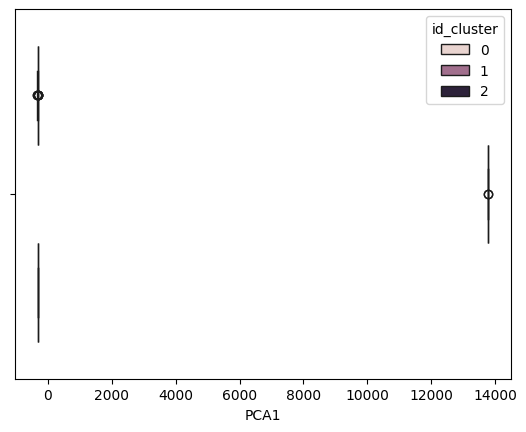

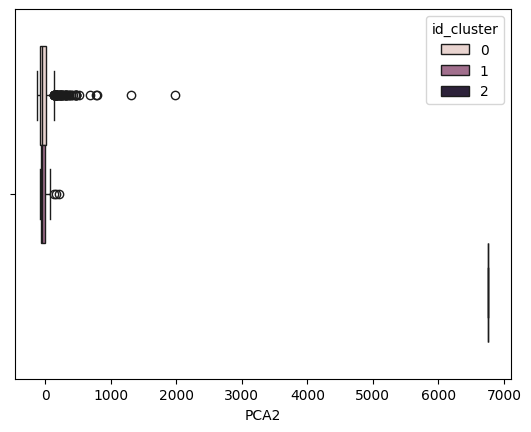

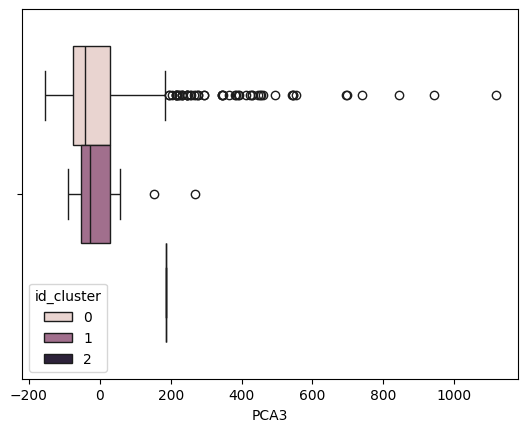

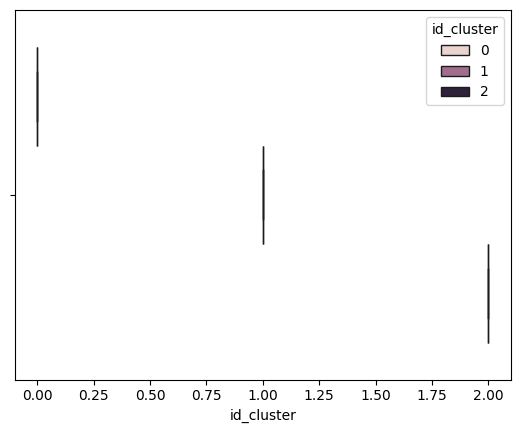

In [53]:
k_val=3
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_pca) # Vector de asignación de etiquetas predichas para cada elemento
kmeans.labels_
data_pca['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_pca.columns:
    sns.boxplot(data_pca,x=col,hue='id_cluster')
    plt.show()

In [57]:
from sklearn.cluster import DBSCAN

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=20)

# Ajustar el modelo a los datos
dbscan.fit(data_cluster)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = dbscan.labels_

# Obtener el número de clusters encontrados (-1 indica muestras ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Número de clusters encontrados:", n_clusters)

# Obtener las muestras asignadas a cada cluster
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)

# Imprimir las muestras asignadas a cada cluster
for label, samples in clusters.items():
    print("Cluster", label)
    print("Muestras:", samples)
    print()

Número de clusters encontrados: 0
Cluster -1
Muestras: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,